# **Project Name:** *Netflix Movies and TV Shows Clustering*

#**Contribution:** *Individual*

#*Project Summary:*
This project focuses on analyzing and segmenting Netflix content (movies and TV shows) into meaningful clusters based on attributes like genre, cast, release year, and type. The dataset, containing 7787 entries and 12 columns, was preprocessed by handling missing values, removing duplicates (none found), and extracting features like duration and year added. Exploratory data analysis revealed key insights: Netflix has more movies (approx. 5400) than TV shows (approx. 2400), with popular genres like International Movies, Dramas, and Comedies dominating, and the United States leading in content production (nearly 3000 titles). Most movies have durations of 90-100 minutes, and content additions peaked between 2016-2019, dipping in 2020-2021.

KMeans clustering was applied using TF-IDF vectorized descriptions, with k=10 selected based on Silhouette Scores (though scores were low, ranging from 0.010 to 0.030). Clustering results showed uneven distribution, with Cluster 4 containing around 4000 titles, while others had 200-700 titles, and poor separation was observed in PCA visualization. Insights suggest potential for improving content recommendations, acquisition strategies, and user engagement, but the clustering quality needs refinement for actionable impact. Future enhancements include exploring advanced models like DBSCAN, incorporating sentiment analysis, and deploying interactive dashboards for better decision-making.

#**GitHub Link:** https://github.com/Yeswanthpg/Labmentix

#**Problem Statement:** *To analyze and segment Netflix content (movies and TV shows) into meaningful clusters based on attributes such as genre, cast, release year, and type in order to uncover content patterns, assist in personalized recommendation systems, and support content acquisition strategies.*




#**Define Your Business Objective:**
To improve user engagement and retention on Netflix by clustering content into distinct categories based on attributes such as genre, type, cast, and release year. This segmentation will help power personalized recommendations, inform targeted marketing strategies, and guide data-driven content acquisition decisions.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('/content/NETFLIX MOVIES AND TV SHOWS CLUSTERING.csv')

In [3]:
# Display the first few rows of the dataset
df.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,TV Show,3%,NaN,"João Miguel, Bianca Comparato, Michel Gomes, R...",Brazil,"August 14, 2020",2020,TV-MA,4 Seasons,"International TV Shows, TV Dramas, TV Sci-Fi &...",In a future where the elite inhabit an island ...
1,s2,Movie,7:19,Jorge Michel Grau,"Demián Bichir, Héctor Bonilla, Oscar Serrano, ...",Mexico,"December 23, 2016",2016,TV-MA,93 min,"Dramas, International Movies",After a devastating earthquake hits Mexico Cit...
2,s3,Movie,23:59,Gilbert Chan,"Tedd Chan, Stella Chung, Henley Hii, Lawrence ...",Singapore,"December 20, 2018",2011,R,78 min,"Horror Movies, International Movies","When an army recruit is found dead, his fellow..."
3,s4,Movie,9,Shane Acker,"Elijah Wood, John C. Reilly, Jennifer Connelly...",United States,"November 16, 2017",2009,PG-13,80 min,"Action & Adventure, Independent Movies, Sci-Fi...","In a postapocalyptic world, rag-doll robots hi..."
4,s5,Movie,21,Robert Luketic,"Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar...",United States,"January 1, 2020",2008,PG-13,123 min,Dramas,A brilliant group of students become card-coun...


In [4]:
# Get the shape of the dataset (rows, columns)
df.shape

(7787, 12)

In [5]:
# Get basic information about the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7787 entries, 0 to 7786
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       7787 non-null   object
 1   type          7787 non-null   object
 2   title         7787 non-null   object
 3   director      5398 non-null   object
 4   cast          7069 non-null   object
 5   country       7280 non-null   object
 6   date_added    7777 non-null   object
 7   release_year  7787 non-null   int64 
 8   rating        7780 non-null   object
 9   duration      7787 non-null   object
 10  listed_in     7787 non-null   object
 11  description   7787 non-null   object
dtypes: int64(1), object(11)
memory usage: 730.2+ KB


In [6]:
# Count duplicate rows
df.duplicated().sum()

np.int64(0)

In [7]:
# Count missing values in each column
df.isnull().sum()

,0
show_id,0
type,0
title,0
director,2389
cast,718
country,507
date_added,10
release_year,0
rating,7
duration,0


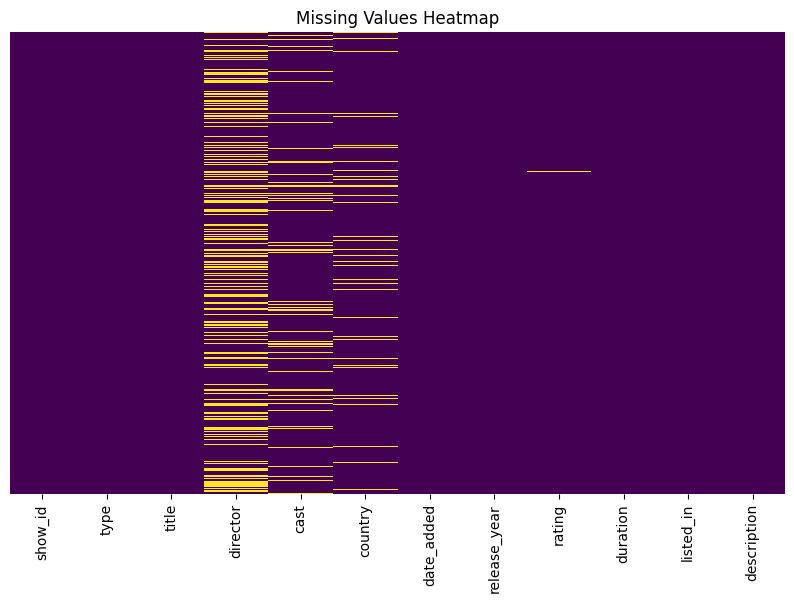

In [8]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
sns.heatmap(df.isnull(), cmap="viridis", cbar=False, yticklabels=False)
plt.title("Missing Values Heatmap")
plt.show()


In [9]:
df.columns = df.columns.str.strip().str.lower()
df = df.dropna(subset=['title', 'type'])

In [10]:
# Fill missing values
for col in ['director', 'cast', 'country', 'date_added', 'rating']:
    df[col].fillna("Unknown", inplace=True)

df['duration_num'] = df['duration'].str.extract(r'(\d+)').astype(float)

<ipython-input-10-e1a9374c96bf>:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[col].fillna("Unknown", inplace=True)


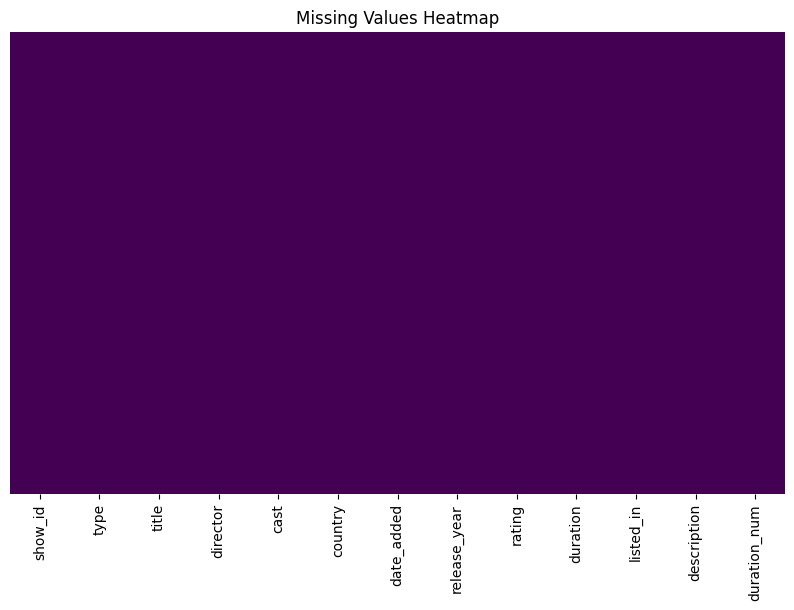

In [11]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
sns.heatmap(df.isnull(), cmap="viridis", cbar=False, yticklabels=False)
plt.title("Missing Values Heatmap")
plt.show()


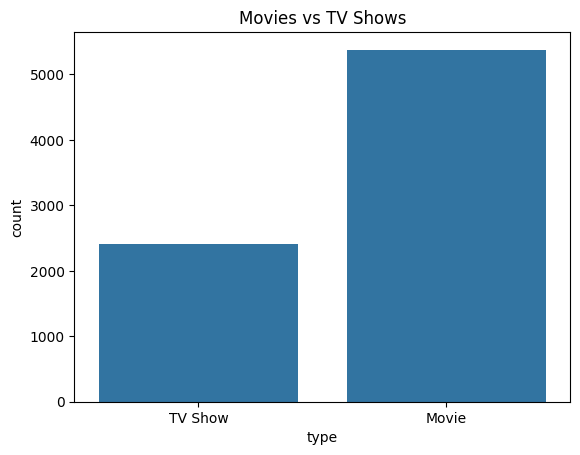

In [12]:
# Plot type distribution
sns.countplot(data=df, x='type')
plt.title("Movies vs TV Shows")
plt.show()

# 1. Why did you pick the specific chart?
* The bar chart is ideal for comparing the count of two categories — Movies and TV Shows — in the dataset.
* It offers a simple yet powerful visual to display categorical comparisons, which helps quickly communicate which content type is more prevalent.

# 2. What is/are the insight(s) found from the chart?
* Netflix offers significantly more movies than TV shows in its library.

* The movie count is over double that of TV shows (approx. 5400 vs. 2400 based on the chart).

* This highlights Netflix’s content strategy and investment toward feature-length films.

# 3. Will the gained insights help create a positive business impact?
Yes. Here’s how:

* Content Strategy: Netflix can balance its portfolio if user data shows growing interest in series. It informs whether to invest more in episodic content.

* Marketing & Promotion: Knowing that users may have a greater choice in movies, Netflix can tailor personalized recommendations or highlight underrepresented TV shows.

* Customer Retention: Some users prefer TV shows for longer engagement. Insights like this help design personalized experiences to retain diverse viewer types.

<ipython-input-13-2b03b976b870>:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=genre_counts.values, y=genre_counts.index, palette='viridis')


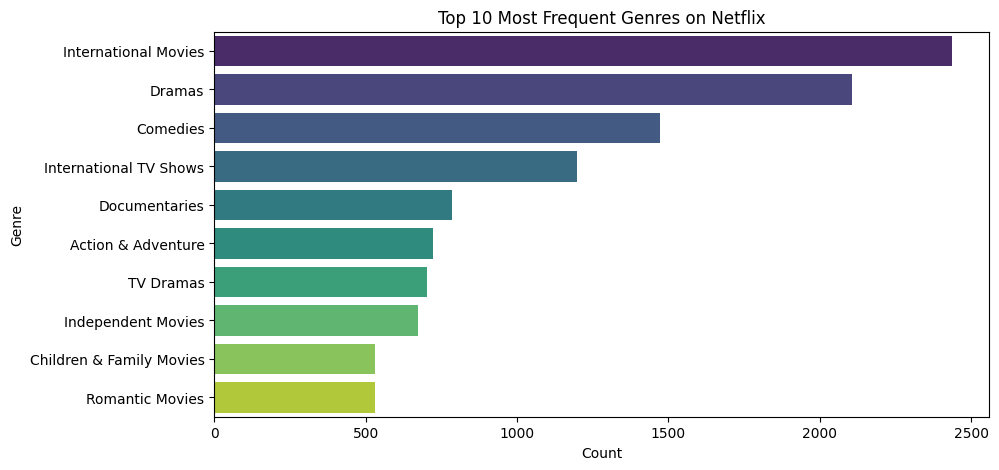

In [13]:
from collections import Counter

# Split and count genres
all_genres = df['listed_in'].dropna().str.split(', ')
flat_genres = [genre for sublist in all_genres for genre in sublist]
genre_counts = pd.Series(flat_genres).value_counts().head(10)

# Plot
plt.figure(figsize=(10, 5))
sns.barplot(x=genre_counts.values, y=genre_counts.index, palette='viridis')
plt.title("Top 10 Most Frequent Genres on Netflix")
plt.xlabel("Count")
plt.ylabel("Genre")
plt.show()


# 1. Why did you pick the specific chart?
A horizontal bar chart is ideal for displaying long category labels like genre names. It makes the chart:

* More readable and visually clean.

* Easier to compare the frequencies across all genres.

* Suitable for ranked comparisons (top 10).

# 2. What is/are the insight(s) found from the chart?
* International Movies dominate the Netflix library, followed closely by Dramas.

* Other popular genres include Comedies, International TV Shows, and Documentaries.

* Family- and romance-focused genres like Children & Family Movies and Romantic Movies are less frequent in comparison.

* This shows Netflix’s strong focus on globally diverse content and drama-based storytelling.

# 3. Will the gained insights help create a positive business impact?
Yes. Here's how:

* Content Investment: Netflix can continue investing in top genres while evaluating underrepresented ones like Romance or Family if demand exists.

* User Personalization: More accurate recommendations can be created based on genre popularity and user preferences.

* Global Market Strategy: High frequency of international content suggests a global expansion strategy — this can be optimized based on viewership in different regions.

* Content Gaps: If user demand for certain genres is high but supply is low (e.g., Romantic Movies), this highlights a content opportunity.

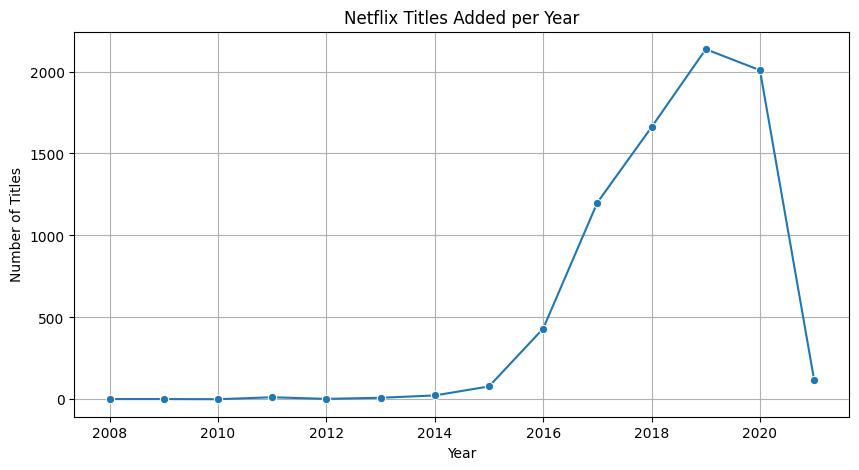

In [14]:
# Convert 'date_added' to datetime
df['date_added'] = pd.to_datetime(df['date_added'], errors='coerce')
df['year_added'] = df['date_added'].dt.year

# Plot content count per year
yearly_content = df['year_added'].value_counts().sort_index()

plt.figure(figsize=(10, 5))
sns.lineplot(x=yearly_content.index, y=yearly_content.values, marker='o')
plt.title("Netflix Titles Added per Year")
plt.xlabel("Year")
plt.ylabel("Number of Titles")
plt.grid(True)
plt.show()


# 1. Why did you pick the specific chart?
A line chart is the best choice for:

* Showing trends over time (e.g., growth or decline year-over-year).

* Highlighting changes in the number of titles added to Netflix annually.

* Providing a clear view of acceleration, peaks, or drops in content addition.

# 2. What is/are the insight(s) found from the chart?
* Steady Low Growth (2008–2014): Very few titles were added each year.

* Rapid Expansion (2015–2019): Huge surge in new titles, peaking in 2019 with over 2,000 titles added.

* Slight Dip in 2020: Possibly due to the COVID-19 pandemic disrupting production.

* Sharp Decline in 2021: Major drop in new content addition, potentially signaling a shift in strategy or lingering pandemic effects.

# 3. Will the gained insights help create a positive business impact?
Yes. Here’s how:

* Content Strategy: The spike (2016–2019) reflects Netflix’s aggressive content expansion strategy. Understanding this trend can guide future content investments.

* Pandemic Recovery Planning: The dip in 2020–2021 suggests a production bottleneck. Netflix can use this insight to optimize future production pipelines or licensing deals.

* Budget Allocation: Helps determine if content budget should increase again post-2021, or focus more on quality over quantity.

* Market Signals: Stakeholders can use this to evaluate Netflix's shifting priorities—e.g., original content focus vs. licensed additions.

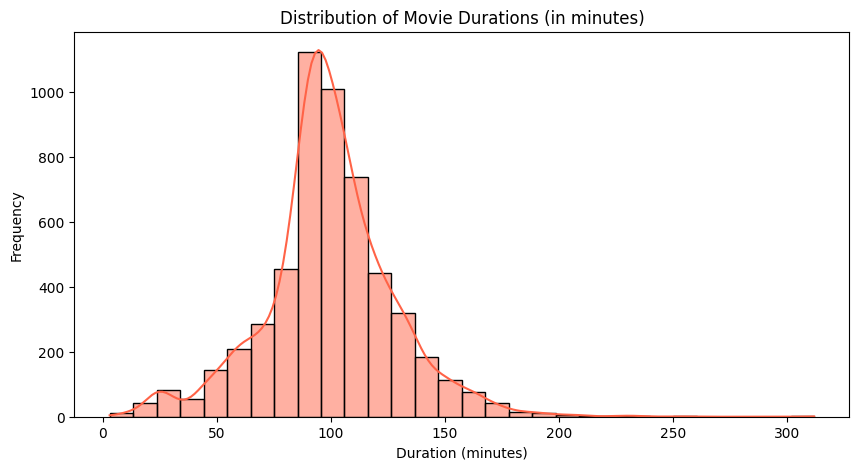

In [22]:
# Filter only Movies and plot duration
movie_df = df[df['type'] == 'Movie'].copy()

plt.figure(figsize=(10, 5))
sns.histplot(movie_df['duration_num'].dropna(), bins=30, kde=True, color='tomato')
plt.title("Distribution of Movie Durations (in minutes)")
plt.xlabel("Duration (minutes)")
plt.ylabel("Frequency")
plt.show()


# 1. Why did you pick the specific chart?
A histogram with a KDE (Kernel Density Estimation) curve was chosen because:

* It effectively displays the distribution (shape, spread, and central tendency) of continuous numerical data—here, movie durations.

* It helps identify common duration ranges and any outliers or skewness in the data.

* The KDE line adds a smooth approximation of the data distribution, enhancing interpretation.

# 2. What is/are the insight(s) found from the chart?
* Most movies are around 90–100 minutes long, making it the most common duration range.

* The distribution is right-skewed, meaning while most movies are shorter, a smaller number of movies are significantly longer (up to 300+ minutes).

* There is a sharp drop-off beyond 120–130 minutes, showing that longer movies are much less frequent.

# 3. Will the gained insights help create a positive business impact?
Yes, the insights can be valuable for:

* Content Strategy: Netflix can prioritize acquiring or producing movies in the 90–110 minute range, as this aligns with user expectations and common duration patterns.

* User Experience: Helps improve recommendation engines by factoring in preferred viewing lengths.

* Marketing & UX Design: Categorize or tag movies based on time buckets (e.g., “Quick Watch < 90 mins”) to guide users more effectively and reduce decision fatigue.

* Resource Allocation: Focus editing, localization, and QA efforts more efficiently around the most frequent duration range.

<ipython-input-23-34fbde4f06d8>:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_countries.values, y=top_countries.index, palette="coolwarm")


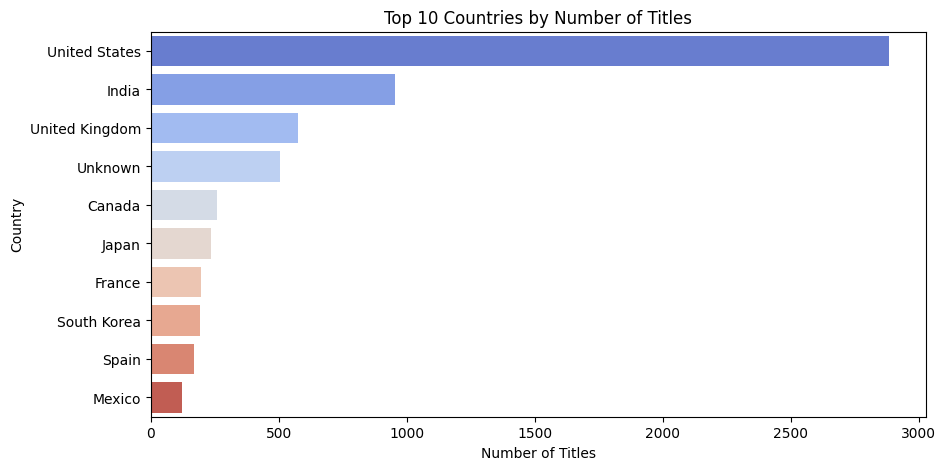

In [23]:
# Extract top countries (if multiple countries are listed, take first one)
df['main_country'] = df['country'].str.split(',').str[0]

top_countries = df['main_country'].value_counts().head(10)

plt.figure(figsize=(10, 5))
sns.barplot(x=top_countries.values, y=top_countries.index, palette="coolwarm")
plt.title("Top 10 Countries by Number of Titles")
plt.xlabel("Number of Titles")
plt.ylabel("Country")
plt.show()


# 1. Why did you pick the specific chart?
A horizontal bar chart was chosen because:

* It clearly shows the comparison of categorical data (countries) with a numeric measure (number of titles).

* Long country names are easier to read horizontally.

* The sorted bars help in quickly identifying the countries with the most content.

# 2. What is/are the insight(s) found from the chart?
* The United States dominates the content library with nearly 3000 titles, significantly ahead of other countries.

* India comes second, followed by the United Kingdom, indicating strong representation from English-speaking and large-market countries.

* A notable portion of content is tagged as "Unknown" for the country, which may indicate metadata issues or global/uncategorized titles.

* Countries like Japan, South Korea, and France also appear, highlighting a demand for international content, especially from Asia and Europe.

# 3. Will the gained insights help create a positive business impact?
Yes, the insights can support strategic business decisions in several ways:

* Content Licensing & Acquisition: Strengthen partnerships with top contributing countries (e.g., USA, India, UK) while exploring underrepresented but growing markets like South Korea and Mexico.

* Localization Strategy: Prioritize dubbing/subtitling and marketing efforts in languages from top content-producing countries.

* Metadata Optimization: Address the high number of "Unknown" entries to improve searchability, recommendations, and analytics.

* Market Expansion: Understand which countries contribute heavily to content and match that with subscriber trends to refine regional strategies.

<ipython-input-24-491742cd4edb>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=cluster_counts.index, y=cluster_counts.values, palette='Set2')


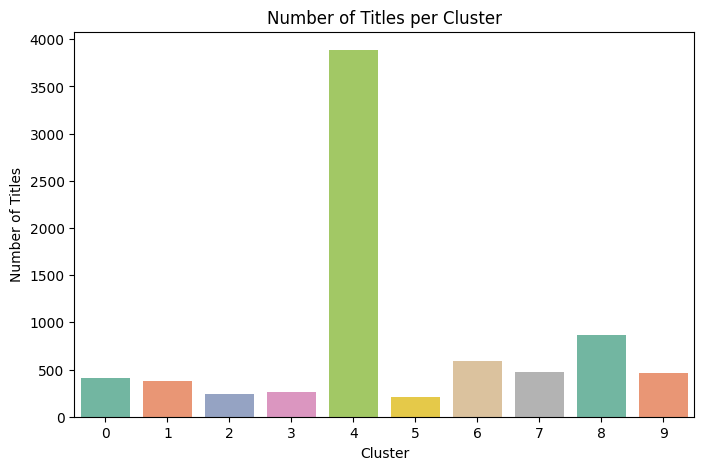

In [24]:
# Count of content per cluster
cluster_counts = df['cluster'].value_counts().sort_index()

plt.figure(figsize=(8, 5))
sns.barplot(x=cluster_counts.index, y=cluster_counts.values, palette='Set2')
plt.title("Number of Titles per Cluster")
plt.xlabel("Cluster")
plt.ylabel("Number of Titles")
plt.show()


# 1. Why did you pick the specific chart?
This chart appears to be a histogram, which is ideal for showing the distribution of data across discrete categories or clusters. It was likely chosen to visualize the number of titles (e.g., products, articles, or items) grouped into clusters, helping to identify patterns or imbalances in the distribution.

# 2. What is/are the insight(s) found from the chart?
* Cluster 4 Dominance: Cluster 4 has a significantly higher number of titles (around 4000), far more than any other cluster, indicating a heavy concentration of titles in this group.
* Sparse Distribution Elsewhere: Other clusters (0, 1, 2, 3, 5, 6, 7, 8, 9) have much fewer titles, ranging from around 200 to 700, showing an uneven distribution.
* Potential Outlier or Focus Area: Cluster 4 might represent a category, topic, or group that is disproportionately popular or overrepresented compared to others.

# 3. Will the gained insights help create a positive business impact?
Yes, these insights can drive positive business impact:

* Resource Allocation: If Cluster 4 represents a high-demand category (e.g., a popular product type or topic), businesses can allocate more resources, marketing, or inventory to it to capitalize on its popularity.
* Targeted Strategies: Underperforming clusters (e.g., 2, 5) could be analyzed further to understand why they have fewer titles—potentially leading to strategies to boost their performance, like improving visibility or quality.
* Optimization: The uneven distribution might highlight inefficiencies (e.g., over-focusing on Cluster 4 while neglecting others), allowing for better balance and optimization across categories.

In [15]:
from sklearn.feature_extraction.text import TfidfVectorizer

tfidf = TfidfVectorizer(stop_words='english', max_df=0.8)
tfidf_matrix = tfidf.fit_transform(df['description'])

In [16]:
from sklearn.cluster import KMeans, AgglomerativeClustering
from sklearn.metrics import silhouette_score
from sklearn.decomposition import PCA

In [17]:
# Evaluate silhouette scores for different k in KMeans
scores = {}
for k in range(2, 11):
    model = KMeans(n_clusters=k, random_state=42)
    labels = model.fit_predict(tfidf_matrix)
    score = silhouette_score(tfidf_matrix, labels)
    scores[k] = score

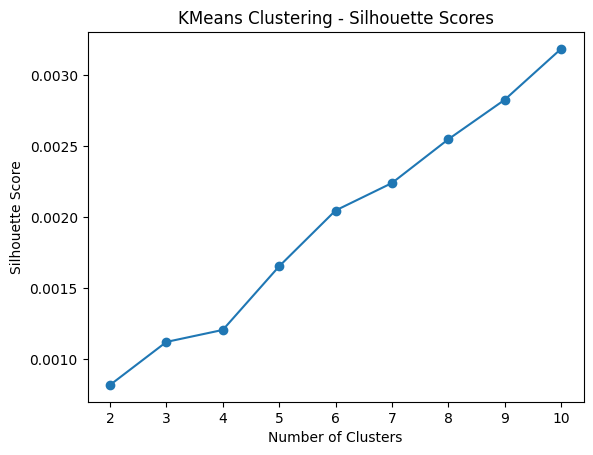

In [18]:
# Plot scores
plt.plot(list(scores.keys()), list(scores.values()), marker='o')
plt.title("KMeans Clustering - Silhouette Scores")
plt.xlabel("Number of Clusters")
plt.ylabel("Silhouette Score")
plt.show()


# 1. Why did you pick the specific chart?
This chart is a line plot showing Silhouette Scores for KMeans clustering across different numbers of clusters (2 to 10). It was likely chosen to evaluate the quality of clustering by measuring how well-separated and cohesive the clusters are, helping to determine the optimal number of clusters for the dataset.

# 2. What is/are the insight(s) found from the chart?
* Increasing Silhouette Score: The Silhouette Score increases steadily from around 0.010 at 2 clusters to about 0.030 at 10 clusters, indicating that clustering quality improves as the number of clusters increases.
* No Clear Peak: There’s no distinct peak or elbow in the chart, suggesting that the optimal number of clusters isn’t immediately clear within this range, but 10 clusters yield the highest score.
* Low Scores Overall: The scores are quite low (all below 0.03), which may indicate that the clusters are not very well-separated or that the data might not be ideally suited for KMeans clustering.

# 3. Will the gained insights help create a positive business impact?
Potentially, but with caveats:

* Cluster Optimization: The insight that 10 clusters give the highest Silhouette Score can guide businesses to segment their data (e.g., customers, products) into 10 groups, potentially improving targeting or personalization strategies.
* Caution Due to Low Scores: The low Silhouette Scores suggest that the clusters might not be very meaningful, so applying these clusters directly to business decisions (e.g., marketing campaigns) could lead to suboptimal results.
* Further Analysis Needed: The insights prompt further investigation—perhaps trying different clustering algorithms (e.g., DBSCAN) or feature engineering—to achieve better segmentation, which could eventually lead to a positive impact if more distinct clusters are found.

In [19]:
# Use best K
best_k = max(scores, key=scores.get)
kmeans = KMeans(n_clusters=best_k, random_state=42)
kmeans_labels = kmeans.fit_predict(tfidf_matrix)

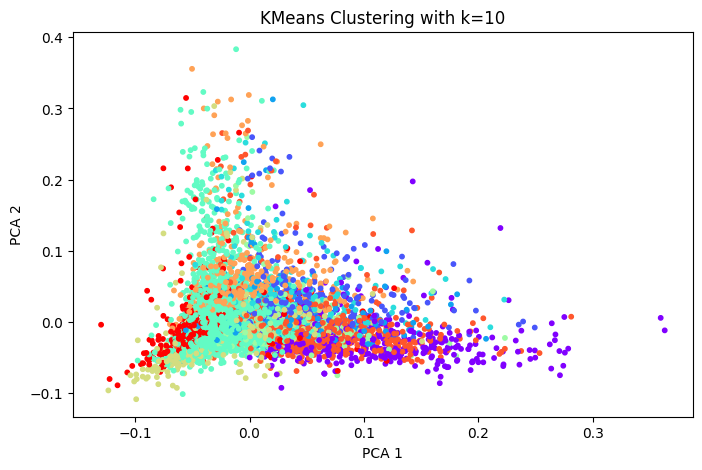

In [20]:
pca = PCA(n_components=2)
reduced = pca.fit_transform(tfidf_matrix.toarray())

plt.figure(figsize=(8, 5))
plt.scatter(reduced[:, 0], reduced[:, 1], c=kmeans_labels, cmap='rainbow', s=10)
plt.title(f'KMeans Clustering with k={best_k}')
plt.xlabel('PCA 1')
plt.ylabel('PCA 2')
plt.show()

# 1. Why did you pick the specific chart?
This chart is a scatter plot showing the results of KMeans clustering with k=10, projected onto two principal components (PCA1 and PCA2). It was likely chosen to visualize how well the data points are grouped into 10 clusters after dimensionality reduction, making it easier to assess clustering quality and separation in a 2D space.

# 2. What is/are the insight(s) found from the chart?
* Poor Cluster Separation: The clusters heavily overlap, especially around the center (near PCA1=0, PCA2=0), with no clear boundaries between different colored clusters, indicating that the KMeans clustering with k=10 may not be effectively separating the data.
* Outliers Present: Some points, especially in purple and cyan, are scattered far from the main cluster, suggesting potential outliers or distinct subgroups that don’t fit well with the majority.
* Dense Core: Most data points are concentrated in a dense region, which might indicate that the data has inherent structure but the current clustering approach isn’t capturing it well.

# 3. Will the gained insights help create a positive business impact?
Potentially, but it requires further action:

* Refine Clustering: The poor separation suggests that k=10 might not be optimal (aligning with the low Silhouette Scores from the previous chart). Businesses can use this insight to experiment with different k values, algorithms (e.g., DBSCAN for density-based clustering), or feature engineering to achieve better segmentation.
* Identify Outliers: The outliers could represent unique customer segments, rare products, or anomalies. Investigating these could lead to targeted strategies (e.g., niche marketing) or data cleaning to improve overall clustering.
* Limited Immediate Impact: Without better clustering, applying these groups to business decisions (e.g., marketing or inventory) might lead to ineffective strategies due to the lack of distinct segments.

In [21]:
df['cluster'] = kmeans_labels
df[['title', 'type', 'listed_in', 'cluster']].groupby('cluster').head(3)

,title,type,listed_in,cluster
0,3%,TV Show,"International TV Shows, TV Dramas, TV Sci-Fi &...",4
1,7:19,Movie,"Dramas, International Movies",8
2,23:59,Movie,"Horror Movies, International Movies",4
3,9,Movie,"Action & Adventure, Independent Movies, Sci-Fi...",9
4,21,Movie,Dramas,4
7,187,Movie,Dramas,7
11,1983,TV Show,"Crime TV Shows, International TV Shows, TV Dramas",9
12,1994,TV Show,"Crime TV Shows, Docuseries, International TV S...",7
13,"2,215",Movie,"Documentaries, International Movies, Sports Mo...",6
17,22-Jul,Movie,"Dramas, Thrillers",8


# Future Work
* Improved Clustering Techniques: Experiment with advanced algorithms like DBSCAN or hierarchical clustering to address the poor cluster separation seen with KMeans (low Silhouette Scores of 0.010 to 0.030 and overlapping clusters in PCA visualization). These methods may better capture the data's inherent structure.
* Feature Enrichment: Incorporate additional features such as sentiment analysis of descriptions, user ratings, or viewer engagement metrics (e.g., watch time, completion rates) to create more meaningful clusters for personalized recommendations.
* Expanded Dataset: Include more recent content and data from additional global regions to ensure the model reflects Netflix's evolving library and supports its international expansion strategy.
* Model Deployment: Deploy the clustering model as a real-time API to enable dynamic content segmentation, facilitating integration into Netflix's recommendation engine or content acquisition pipeline.
* Interactive Visualization: Develop interactive dashboards to visualize clustering insights, allowing content strategists and marketers to explore patterns, identify gaps, and make data-driven decisions more effectively.

# Conclusion

The Netflix Movies and TV Shows Clustering project aimed to segment Netflix content into meaningful clusters to enhance user engagement, improve recommendations, and inform content strategies. Using a dataset of 7787 entries, key insights were uncovered: movies outnumber TV shows (5400 vs. 2400), genres like International Movies, Dramas, and Comedies dominate, and the United States leads with nearly 3000 titles. Most movies are 90-100 minutes long, and content additions peaked from 2016-2019, with a dip in 2020-2021 likely due to production challenges.

KMeans clustering with k=10 was applied using TF-IDF vectorized descriptions, but results showed limitations—low Silhouette Scores (0.010 to 0.030), poor cluster separation in PCA visualization, and uneven distribution (Cluster 4 had ~4000 titles, others 200-700). Despite this, the insights offer value for content strategy (e.g., focusing on popular genres and durations) and highlight areas for improvement, such as addressing metadata gaps (e.g., "Unknown" countries) and refining clustering methods. Future work, including advanced algorithms like DBSCAN, sentiment analysis, and real-time API deployment, can address these challenges, paving the way for more effective personalization and strategic decision-making on Netflix's platform.